In [78]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import matrix,array
import pandas as pd
import lda as ldalib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
points = 1_000

# Normal data
mu1 , sig1 = array([7.,-2.]) , matrix('5 -2 ; -2 2')
mu2 , sig2 = array([-3.,2.]) , matrix('5 -2 ; -2 2')
mu3 , sig3 = array([-1.,-4.]) , matrix('5 -2 ; -2 2')

# Fucked data
# mu1 , sig1 = array([-2.,0]) , matrix('5 -2 ; -2 2')
# mu2 , sig2 = array([-3.,-3.]) , matrix('5 -3 ; -3 2')
# mu3 , sig3 = array([-1.,-4.]) , matrix('10 4 ; 4 2')

data1 = np.random.multivariate_normal(mu1,sig1,points)
data2 = np.random.multivariate_normal(mu2,sig2,points)
data3 = np.random.multivariate_normal(mu3,sig3,points)

data = pd.DataFrame(np.concatenate([data1,data2,data3]))
targets = pd.DataFrame({"target":[0]*points+[1]*points+[2]*points})

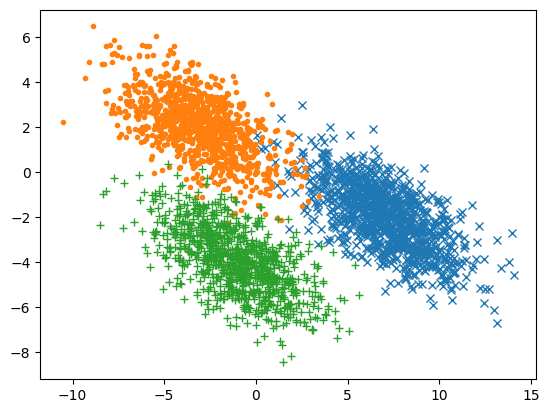

In [80]:
plt.plot(data1[:,0],data1[:,1],'x')
plt.plot(data2[:,0],data2[:,1],'.')
plt.plot(data3[:,0],data3[:,1],'+')

In [81]:
lda = ldalib.LDA_reducer(data.assign(target=targets),2,"target",scree_plot=False)
W = lda.Sw

Preserving 100.0% of variance


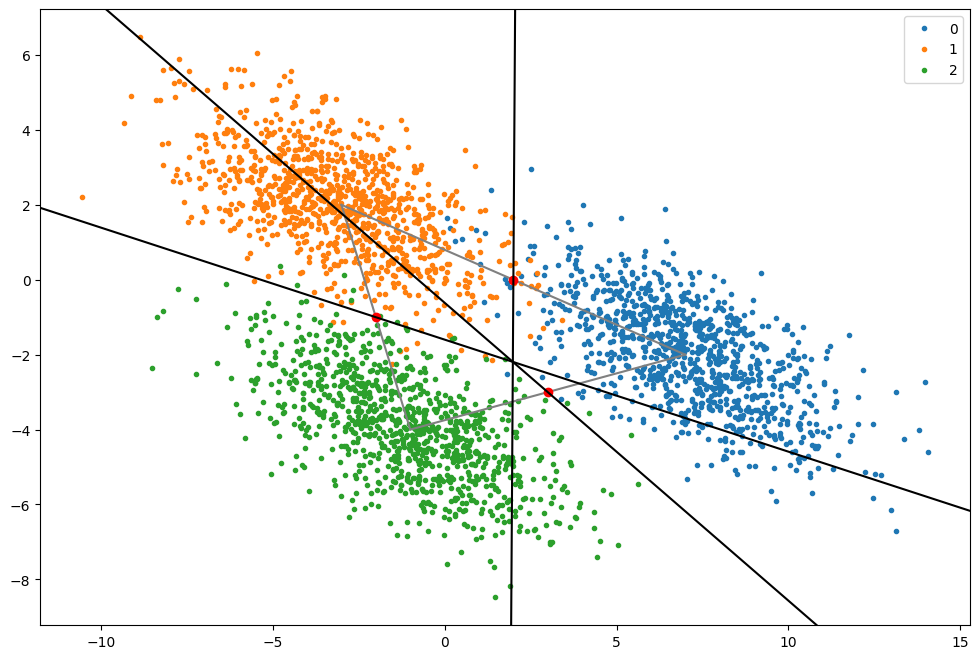

In [82]:
# https://stats.stackexchange.com/questions/92157/compute-and-graph-the-lda-decision-boundary

# Matrix to get a vector orthogonal to the current one
ortho = matrix('0 1 ; -1 0')

# Plots scatter
plt.subplots(figsize=(12,8))
plt.plot(data1[:,0],data1[:,1],'.')
plt.plot(data2[:,0],data2[:,1],'.')
plt.plot(data3[:,0],data3[:,1],'.')

# Midpoint between means
c12 = (mu1 + mu2)/2
c13 = (mu1 + mu3)/2
c23 = (mu2 + mu3)/2

xlim = plt.xlim()
ylim = plt.ylim()

# Plot lines connecting means
plt.plot([mu1[0],mu2[0]],[mu1[1],mu2[1]],c="gray")
plt.plot([mu1[0],mu3[0]],[mu1[1],mu3[1]],c="gray")
plt.plot([mu2[0],mu3[0]],[mu2[1],mu3[1]],c="gray")

# Plots mean of means
plt.plot(c12[0],c12[1],'o',c="red")
plt.plot(c13[0],c13[1],'o',c="red")
plt.plot(c23[0],c23[1],'o',c="red")

b12 = ortho*np.linalg.inv(W)*(np.matrix(mu1).T-np.matrix(mu2).T)*1e6
b13 = ortho*np.linalg.inv(W)*(np.matrix(mu1).T-np.matrix(mu3).T)*1e6
b23 = ortho*np.linalg.inv(W)*(np.matrix(mu2).T-np.matrix(mu3).T)*1e6

plt.plot([c12[0]-float(b12[0]),c12[0]+float(b12[0])],[c12[1]-float(b12[1]),c12[1]+float(b12[1])],c="black")
plt.plot([c13[0]-float(b13[0]),c13[0]+float(b13[0])],[c13[1]-float(b13[1]),c13[1]+float(b13[1])],c="black")
plt.plot([c23[0]-float(b23[0]),c23[0]+float(b23[0])],[c23[1]-float(b23[1]),c23[1]+float(b23[1])],c="black")

plt.xlim(xlim)
plt.ylim(ylim)

plt.legend([x for x in range(3)])

----
## Linear Discriminant Function

$$\Large \delta_k(x) = x^T \Sigma^{-1}\mu_k - \frac 1 2 \mu_k^T\Sigma^{-1}\mu_k + \log \pi_k$$

where
- $x$ : Sample to evaluate
- $\Sigma$ : Covariance of the distributions ($S_W$ for LDA)
- $\mu_k$ : Mean of class $k$
- $\pi_k$ : Prior of class $k$

In [83]:
lda_class = ldalib.LDA_classifier(data,targets)
predictions = lda_class.classifier(data)

print("Accuracy :", sum( np.squeeze(targets) == predictions ) / len(data) )

qda_class = ldalib.QDA_classifier(data,targets)
predictions = qda_class.classifier(data)

print("Accuracy :", sum( np.squeeze(targets) == predictions ) / len(data) )


Accuracy : 0.983
Accuracy : 0.983
